# Montgomery County Driver's Guide
    by Isaac Hirzel and Riley Galloway
    
    
### Introduction
    This report is analyzing the automobile accident statistics in and around Montgomery County. Specifically the report will be focusing on the effects of weather, time, control type, and location on crash frequency and severity.
    
### Background
    The data used in this report was collected from https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Drivers-Data/mmzv-x632 which is Montgomery County of Maryland's official crash report dataset. The specific sample of data was taken one March 18th and does not contain any data newer than that date. The data itself was collected from police departments and other governing bodies that handle reporting of accidents.

### Initialization
    The following code is initialization of the dataset as well as pruning specific columns unimportant to our research

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams

# graphics (the right size will depend on your system)
rcParams['figure.figsize'] = 10,6
sns.set_context('notebook')   # 'talk' for slightly larger..

# read the data
df = pd.read_csv("https://raw.githubusercontent.com/ikehirzel/cst383-proj1/main/crash_reports.csv", low_memory=False)

# turn the accident time into Pandas timestamp values, and make time the index
# of the dataframe
df.index = pd.to_datetime(df['Crash Date/Time'])
df = df.sort_index()

# drop the columns that won't be used (this depends completely on your project)
df = df.drop(['Agency Name', 'ACRS Report Type','Report Number',
              'Local Case Number', 'Person ID', 'Off-Road Description', 
              'Municipality', 'Vehicle ID', 'Drivers License State', 
              'Non-Motorist Substance Abuse', 'Driverless Vehicle',	
              'Parked Vehicle', 'Latitude',	'Longitude', 'Location', 
              'Cross-Street Type', 'Related Non-Motorist', 'Crash Date/Time', 'Circumstance'], axis=1)

# creating an "hour of day" column
# a "day of week" or "month of year" column might also be handy
df['hour'] = df.index.hour

#### Question
    Initially we wanted to know where accidents were most centralized, so we isolated the top 10 streets with the highest accidents

Text(0, 0.5, 'Count')

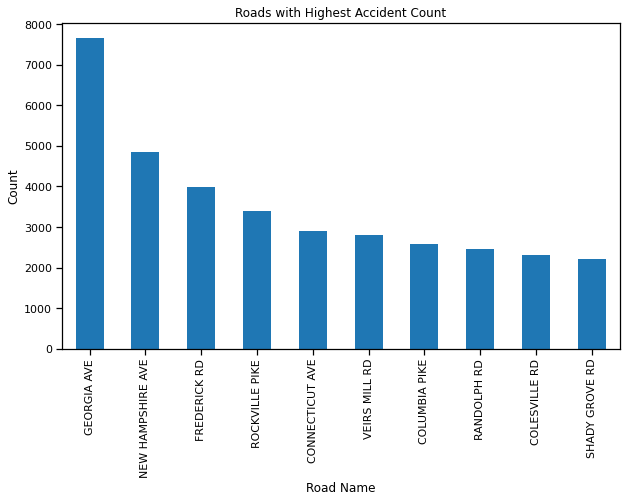

In [2]:
df["Road Name"].dropna().value_counts(ascending=False)[:10].plot.bar()
plt.title("Roads with Highest Accident Count")
plt.xlabel("Road Name")
plt.ylabel("Count")

#### Results
    This showed us that accidents were very high on Georgia Avenue and New Hampshire Avenue but did not lead to much decisive information as it gives us no info on whether these roads just happen to be more popular or if they are genuinely more dangerous.
    
#### Question
    Because of this, we decided to isolate it to the highest accident prone intersections and see the correlation between the roads with the highest accidents.

Text(0, 0.5, 'Count')

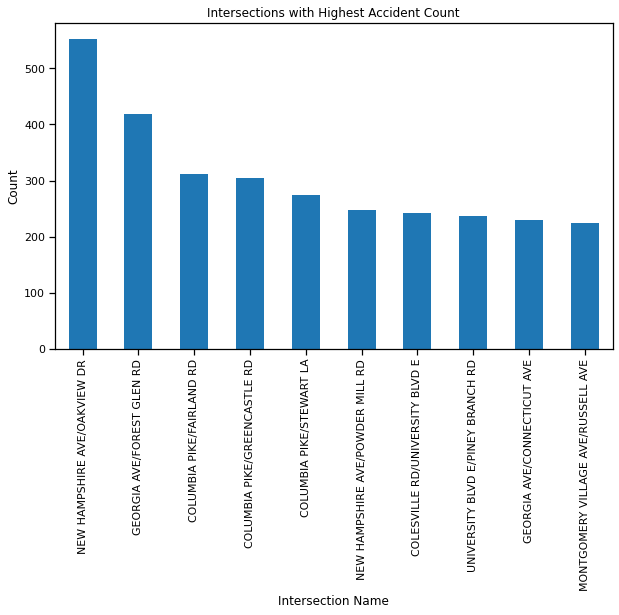

In [3]:
(df["Road Name"] + "/" + df["Cross-Street Name"]).dropna().value_counts(ascending=False)[:10].plot.bar()
plt.title("Intersections with Highest Accident Count")
plt.xlabel("Intersection Name")
plt.ylabel("Count")

#### Results
    This showed us a glimpse of more specifically where accdidents are concentrated. While Georgia Ave was the road with the highest accidents, only 2 of the top 10 intersections were on it. Interestingly, Columbia Pike, the 7th highest accident prone street had 3 of the top 10 most dangerous intersections on it, implying that it is potentially more dense in terms of accidents than Georgia Ave.
    
#### Question
    We then wanted to know what speeds most accidents tended to take place at.

Text(0.5, 1.0, 'Distribution of Accidents by Speed Limit')

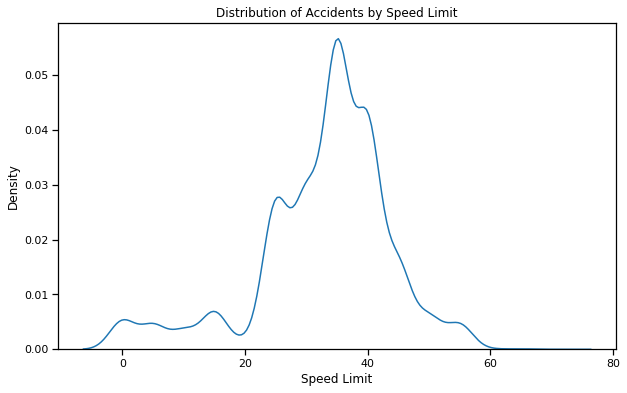

In [4]:
sns.kdeplot(df["Speed Limit"], bw_adjust=2.0)
plt.title("Distribution of Accidents by Speed Limit")

Text(0, 0.5, 'Count')

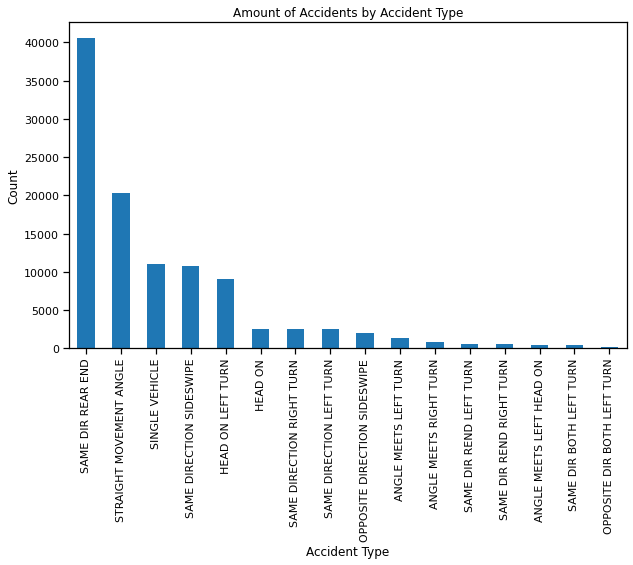

In [11]:
df["Collision Type"][(df["Traffic Control"] != "OTHER") & (df["Traffic Control"] != "UNKNOWN") & (df["Collision Type"] != "UNKNOWN") & (df["Collision Type"] != "OTHER")].dropna().value_counts(ascending=False).dropna().plot.bar()
plt.title("Amount of Accidents by Accident Type")
plt.xlabel("Accident Type")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

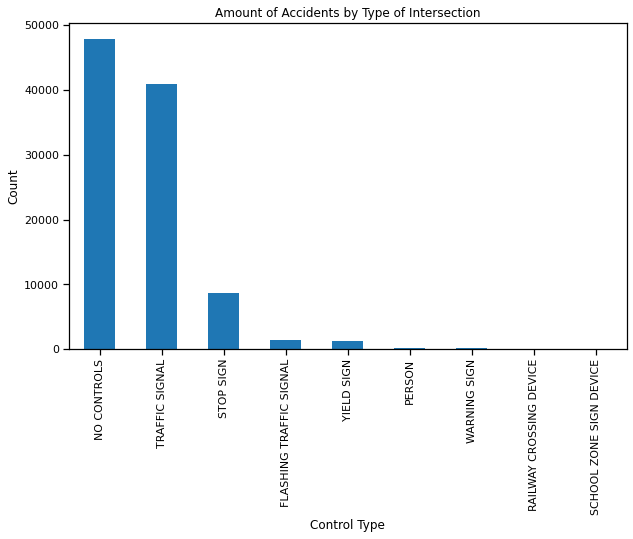

In [13]:
df["Traffic Control"][(df["Traffic Control"] != "OTHER") & (df["Traffic Control"] != "UNKNOWN")].dropna().value_counts(ascending=False).plot.bar()
plt.title("Amount of Accidents by Type of Intersection")
plt.xlabel("Control Type")
plt.ylabel("Count")